In [6]:

# Loading Data 

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [8]:

# Encoding the integer sequences into a binary matrix

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorizing training and test data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorizing labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [9]:

# Building model

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [10]:

# Compiling model

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])


In [13]:

# Configuring Optimizer

from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy'])


In [14]:
# Using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
        loss=losses.binary_crossentropy,
        metrics=[metrics.binary_accuracy])


In [15]:
#  Setting aside a validation set
#  Monitor the accuracy of the model during training on data it has never seen before

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [16]:

# Fitting Model

model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs=20,
                    batch_size=512,validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 236s 4s/step - loss: 0.5325 - acc: 0.7789 - val_loss: 0.4038 - val_acc: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3285 - acc: 0.8957 - val_loss: 0.3192 - val_acc: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2510 - acc: 0.9168 - val_loss: 0.2949 - val_acc: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2021 - acc: 0.9329 - val_loss: 0.2812 - val_acc: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1674 - acc: 0.9446 - val_loss: 0.2815 - val_acc: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1449 - acc: 0.9539 - val_loss: 0.2822 - val_acc: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1261 - acc: 0.9595 - val_loss: 0.2989 - val_acc: 0.8851
Epoch 8/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1094 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


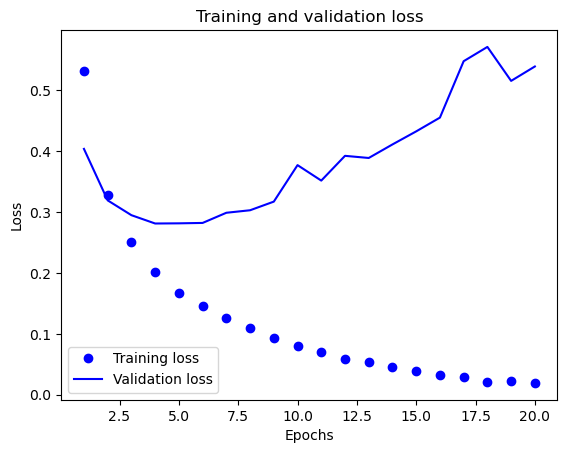

In [19]:
import matplotlib.pyplot as plt

#plotting training and validation loss

history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


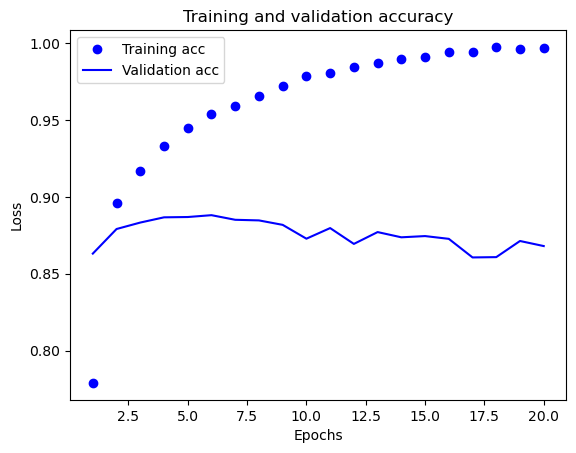

In [20]:
#plotting training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()